In [52]:
import pandas as pd
import numpy as np
from datetime import datetime
from geopy.location import Location, Point
from geopy.geocoders import Nominatim
import seaborn as sns


#### Utilities

In [53]:
def reset_column_location(dataframe, columnname, index):
    col = dataframe.pop(columnname)
    dataframe.insert(index, col.name, col)    


#### 1.0 Read the Chlorophyll Dataset

In [54]:
df = pd.read_csv("chlorophyllver2.csv")
#df=df.dropna()
print(df.shape)
print(f"\nMissing values:{df.isnull().values.any()}")

#Convert Date colum to date time
df["Date"]=pd.to_datetime(df["Date"])
df["Date"]=df.apply(
        lambda r: datetime.combine(r["Date"], datetime.strptime("12:00:00", '%H:%M:%S').time()), 
        axis=1)

#Add column with unix date time
df["UnixDateTime"]=df.apply(lambda r: int(r["Date"].timestamp()),axis=1)
reset_column_location(df,"UnixDateTime",2)

df.head()

(5748, 19)

Missing values:True


,ProvId,Location,UnixDateTime,Municipality,Date,Year,Month,Day,Date2,MinSampleDepth,MaxSampleDepth,Chlorophyll,pH,Temperature,P,DissolvedOxygen,ElecticalConductivity,N,Turbidity,LocationEdited
0,23151,Bäen,950529600,Kristianstad,2000-02-14 12:00:00,2000,2,14,45,1.0,1,1.0,5.65,2.6,7.0,NaN,7.35,752.0,NaN,Bäen
1,23152,Bäen,955454400,Kristianstad,2000-04-11 12:00:00,2000,4,11,102,1.0,1,3.1,5.56,7.1,13.0,NaN,7.57,662.0,NaN,Bäen
2,23153,Bäen,966340800,Kristianstad,2000-08-15 12:00:00,2000,8,15,228,1.0,1,6.8,6.15,20.0,21.0,NaN,7.60,430.0,NaN,Bäen
3,23154,Bäen,971697600,Kristianstad,2000-10-16 12:00:00,2000,10,16,290,1.0,1,10.2,5.86,12.0,14.0,NaN,7.65,459.0,NaN,Bäen
4,23155,Bäen,981979200,Kristianstad,2001-02-12 12:00:00,2001,2,12,43,1.0,1,1.3,4.73,1.7,5.0,NaN,4.87,578.0,NaN,Bäen


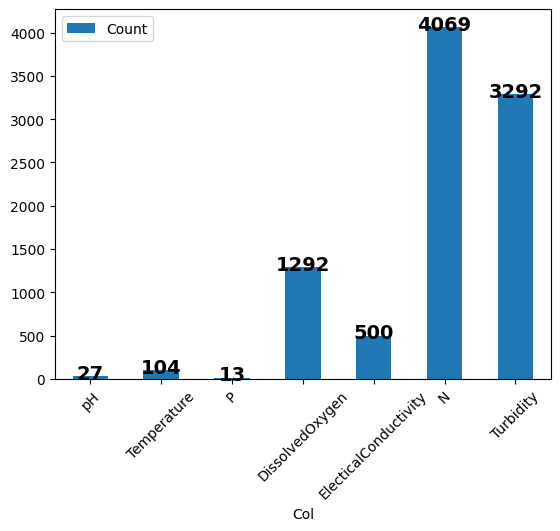

In [55]:
df2 = df.isna().sum().to_frame().reset_index()
df2.columns=["Col","Count"]
df2 =df2.drop(df2[df2["Count"]<=0].index)
plt = df2.plot.bar(x="Col",y="Count",rot=45)

for i, bar in enumerate(plt.axes.patches):
    h = bar.get_height()
    plt.axes.text(
        i, # bar index (x coordinate of text)
        h+30, # y coordinate of text
        '{}'.format(int(h)),  # y label
        ha='center', 
        va='center', 
        fontweight='bold', 
        size=14)


In [56]:
missinglocdict={}
missinglocationsdata = ["Sätoftasjön Hörby,55.89505407591085,13.550725120977544",
"Lärkesholmssjön Örkelljunga,56.28346300773434,13.381261885565555",
"Liasjön Osby,56.450331121161355,13.983204421344116",
"Södra Kroksjön Osby,56.43375947850593,13.88324743667266",
"Hjärtasjön Osby,56.39782689074689,14.280058306263584",
"Rammsjön ÖstraGöinge,56.23380942661445,14.21658083650215",
"Enegylet Bromölla,56.167826121436704, 14.557282995265254",
"Mjöasjön Osby,56.46325039006142,14.102104555499626",
"Kroksjön ÖstraGöinge,56.253933823521905,14.220761530335203",
"Ulkenesjön Osby,56.372391266417985,14.27865984401961",
"Vässlarpssjön ÖstraGöinge,56.34434209186086,14.252849527402859",
"Bodarpasjön Osby,56.39724128128473,13.80315145711693",
"Stora Nostra Hässleholm,56.158830107481045,13.764674971245888",
"Grösjön Hässleholm,56.113770928425986,13.54704268361937",
"Gårdsjön ÖstraGöinge,56.316298982118596,14.293108987475941",
"Farlången ÖstraGöinge,56.30874146568836,14.27506061310088",
"Bandsjön Klippan,56.08009108852464,13.304572253694136",
"Gårdsjö Hässleholm,56.28745226309046,13.521882157328285",
"Lerjesjön Kristianstad,56.20045266810571,14.299871221131001",
"Rolstorpssjön ÖstraGöinge,56.32434732670482,14.243808494923705",
"Bosarpssjön Hässleholm,55.96324434646524,13.746754334517126",
"Verkesjön Tomelilla,55.718074680857995,13.985979571411406",
"Gårdsjön/Ömanäs Osby,56.31839044336123,14.292350115096218",
"Ekholmssjön Svedala,55.55245093286004,13.312102093271296",
"Tjörnarpssjön Höör,55.994311136719375,13.615336391363163",
"Svanshalssjön Osby,56.41728297172891,13.933333267344013"]
for data in missinglocationsdata:
    x = data.split(',')
    address = x[0]
    latitude = float(x[1])
    longitude = float(x[2])
    missinglocdict[address]=Location(address=address,point=Point(latitude=latitude, longitude=longitude),raw={})

missinglocdict

{'Sätoftasjön Hörby': Location(Sätoftasjön Hörby, (55.89505407591085, 13.550725120977544, 0.0)),
 'Lärkesholmssjön Örkelljunga': Location(Lärkesholmssjön Örkelljunga, (56.28346300773434, 13.381261885565555, 0.0)),
 'Liasjön Osby': Location(Liasjön Osby, (56.450331121161355, 13.983204421344116, 0.0)),
 'Södra Kroksjön Osby': Location(Södra Kroksjön Osby, (56.43375947850593, 13.88324743667266, 0.0)),
 'Hjärtasjön Osby': Location(Hjärtasjön Osby, (56.39782689074689, 14.280058306263584, 0.0)),
 'Rammsjön ÖstraGöinge': Location(Rammsjön ÖstraGöinge, (56.23380942661445, 14.21658083650215, 0.0)),
 'Enegylet Bromölla': Location(Enegylet Bromölla, (56.167826121436704, 14.557282995265254, 0.0)),
 'Mjöasjön Osby': Location(Mjöasjön Osby, (56.46325039006142, 14.102104555499626, 0.0)),
 'Kroksjön ÖstraGöinge': Location(Kroksjön ÖstraGöinge, (56.253933823521905, 14.220761530335203, 0.0)),
 'Ulkenesjön Osby': Location(Ulkenesjön Osby, (56.372391266417985, 14.27865984401961, 0.0)),
 'Vässlarpssjön Öst

In [57]:
ul = df[["LocationEdited","Municipality"]].value_counts().reset_index(name="Counts")
ul

,LocationEdited,Municipality,Counts
0,Östra Ringsjön,Hörby,498
1,Västra Ringsjön,Höör,496
2,Sätoftasjön,Hörby,479
3,Ivösjön,Bromölla,304
4,Oppmannasjön,Kristianstad,294
...,...,...,...
92,Gyllebosjön,Simrishamn,1
93,Ellestadssjön,Ystad,1
94,Ekholmssjön,Svedala,1
95,Bysjön,Lund,1


In [58]:
locdict={}
uniquelocations = ul.shape[0]
print(f"Total locations {uniquelocations}")
loc = Nominatim(user_agent="TestApp")
failedcount =0
for i,r in ul.iterrows():
    l = r["LocationEdited"]
    m = r["Municipality"]
    lakelocation = f"{l}  {m} Skåne Sweden"
    lakelocation= lakelocation.replace("Yddingen","Yddingesjön")
    gc = loc.geocode(lakelocation)    
    
    try:
        if gc is None:
            gc = missinglocdict[f"{l} {m}"]
            print(f"* {lakelocation}\t{gc.address}\t{gc.latitude}\t{gc.longitude}\t")
            locdict[f"{l} {m}"]=gc
        else:
            locdict[f"{l} {m}"]=gc
            print(f"  {lakelocation}\t{gc.address}\t{gc.latitude}\t{gc.longitude}\t")
    except:
        failedcount = failedcount +1 
        print(f"*****{l}****")   

print(f"Total failed count: {failedcount}")
print("Done")




Total locations 97
  Östra Ringsjön  Hörby Skåne Sweden	Östra Ringsjön, Sätofta, Höörs kommun, Skåne län, 243 95, Sverige	55.87328385	13.548270244978635	
  Västra Ringsjön  Höör Skåne Sweden	Västra Ringsjön, Ormanäs och Stanstorp, Höörs kommun, Skåne län, Sverige	55.89209665	13.474797028766929	
* Sätoftasjön  Hörby Skåne Sweden	Sätoftasjön Hörby	55.89505407591085	13.550725120977544	
  Ivösjön  Bromölla Skåne Sweden	Ivösjön, Kristianstads kommun, Skåne län, Sverige	56.109841599999996	14.445882570459545	
  Oppmannasjön  Kristianstad Skåne Sweden	Oppmannasjön, Kristianstads kommun, Skåne län, Sverige	56.107595950000004	14.315765692485044	
  Havgårdssjön  Svedala Skåne Sweden	Havgårdssjön, Dävelstorp, Svedala kommun, Skåne län, Sverige	55.48321425	13.35832006674548	
  Björkesåkrasjön  Svedala Skåne Sweden	Björkesåkrasjön, Lunds kommun, Skåne län, Sverige	55.527504699999994	13.401782219013102	
  Häckebergasjön  Lund Skåne Sweden	Häckebergasjön, Lunds kommun, Skåne län, Sverige	55.5772258	13

In [59]:
for key,val in locdict.items():
    if val is None:
        print(key)

In [60]:
df["Latitude"]=df.apply(lambda r: locdict[f"{r['LocationEdited']} {r['Municipality']}"].latitude, axis=1)
df["Longitude"]=df.apply(lambda r: locdict[f"{r['LocationEdited']} {r['Municipality']}"].longitude, axis=1)

In [61]:
reset_column_location(df,"Latitude",2)
reset_column_location(df,"Longitude",3)
df.head()

,ProvId,Location,Latitude,Longitude,UnixDateTime,Municipality,Date,Year,Month,Day,...,MaxSampleDepth,Chlorophyll,pH,Temperature,P,DissolvedOxygen,ElecticalConductivity,N,Turbidity,LocationEdited
0,23151,Bäen,56.236669,14.383319,950529600,Kristianstad,2000-02-14 12:00:00,2000,2,14,...,1,1.0,5.65,2.6,7.0,NaN,7.35,752.0,NaN,Bäen
1,23152,Bäen,56.236669,14.383319,955454400,Kristianstad,2000-04-11 12:00:00,2000,4,11,...,1,3.1,5.56,7.1,13.0,NaN,7.57,662.0,NaN,Bäen
2,23153,Bäen,56.236669,14.383319,966340800,Kristianstad,2000-08-15 12:00:00,2000,8,15,...,1,6.8,6.15,20.0,21.0,NaN,7.60,430.0,NaN,Bäen
3,23154,Bäen,56.236669,14.383319,971697600,Kristianstad,2000-10-16 12:00:00,2000,10,16,...,1,10.2,5.86,12.0,14.0,NaN,7.65,459.0,NaN,Bäen
4,23155,Bäen,56.236669,14.383319,981979200,Kristianstad,2001-02-12 12:00:00,2001,2,12,...,1,1.3,4.73,1.7,5.0,NaN,4.87,578.0,NaN,Bäen


In [62]:
df["Latitude"].hasnans
df["Longitude"].hasnans

False

In [63]:
df.to_csv("chrolophylldata_with_geocoding.csv",index=False,encoding='utf-8-sig')